## APS da matéria "ANÁLISE DE TEXTO DE FONTES DESESTRUTURADAS E WEB"

Integrantes do grupo:

- Antônio Vicente Fernandes de Andrade  
- Maria Eduarda Santos Silva  
- Sarah Midori

# Raspagem e classificação de questões de matemática do ENEM

# introdução

O Exame Nacional do Ensino Médio (ENEM) é uma das principais portas de entrada para o ensino superior no Brasil. No entanto, muitos estudantes enfrentam dificuldades em organizar seus estudos de forma eficiente, especialmente na disciplina de Matemática, cujos conteúdos são amplos e variados. Nesse contexto, identificar os temas centrais das questões pode ser uma estratégia pedagógica poderosa, permitindo que o aluno concentre seus esforços nas áreas com maior incidência ou dificuldade.

Este projeto propõe o desenvolvimento de um modelo de classificação automática de questões de Matemática do ENEM com base em seus enunciados. A partir da raspagem de mais de 1.500 questões reais da plataforma QConcursos, construímos uma base de dados estruturada e implementamos um modelo de aprendizado de máquina capaz de prever, com base no texto da questão, quais são os temas centrais abordados — como Geometria, Álgebra, Estatística, entre outros.

A solução tem como objetivo final apoiar estudantes no processo de preparação para o ENEM, sugerindo tópicos de estudo a partir das características das próprias questões. O uso de técnicas de Web Scraping, processamento de linguagem natural (NLP) e classificação multilabel permite não apenas automatizar esse processo, mas também abrir caminho para soluções educacionais mais personalizadas e acessíveis.

# Problema

Estudantes que se preparam para o ENEM frequentemente enfrentam dificuldades para identificar quais temas da disciplina de Matemática precisam priorizar em seus estudos. As provas abordam uma ampla variedade de tópicos — como Geometria, Álgebra, Estatística, Funções, entre outros — e os enunciados nem sempre deixam explícito a que tema a questão pertence. Com isso, o aluno perde tempo tentando classificar o conteúdo manualmente ou acaba estudando de forma desorganizada e pouco eficiente.

Além disso, plataformas de estudo e bancos de questões, embora ofereçam filtros por assunto, não são necessariamente consistentes ou acessíveis para todos, especialmente quando os temas das questões estão classificados de maneira genérica ou imprecisa. Falta uma ferramenta acessível que ajude o estudante a identificar automaticamente os temas centrais de cada questão com base apenas no enunciado, otimizando o tempo de estudo e promovendo uma preparação mais focada.

Este projeto busca justamente atacar esse problema: como automatizar a identificação do(s) tema(s) principal(is) de uma questão de Matemática do ENEM a partir de seu enunciado, de forma confiável, usando scraping de dados reais e técnicas de aprendizado de máquina?

# Extração de dados

Para construir uma base robusta de questões de Matemática do ENEM, foi realizada uma extração automatizada de dados por meio da técnica de Web Scraping. Utilizamos a biblioteca Selenium, em conjunto com o navegador Chrome em modo automatizado, para acessar e navegar pelo site QConcursos, uma das maiores plataformas online de questões de provas do ENEM anteriores.O processo envolveu a raspagem de 75 páginas da seção de questões de Matemática do ENEM, totalizando mais de 1.500 questões únicas. Para cada questão, foram extraídos os seguintes campos:

ID da questão: identificação única fornecida pela plataforma;
Ano da prova: permite análises por período;
Assunto(s): classificação fornecida pelo site;
Enunciado: corpo principal da questão, utilizado como entrada para o modelo.

As informações foram coletadas por meio de seletores HTML com o uso de comandos do Selenium, respeitando o tempo de carregamento de cada página para evitar bloqueios ou perdas de informação. Após a coleta, os dados foram armazenados em um DataFrame do pandas para facilitar a manipulação, limpeza e modelagem posterior.

Bibliotecas

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, hamming_loss, classification_report


Ajustando o Selenium

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.set_page_load_timeout(60)


Raspando os dados do site

In [3]:

questoes_data = []

# Loop por pagina
for page in range(1, 76): 
    print(f"Raspando página {page}...")
    url = f"https://www.qconcursos.com/questoes-do-enem/disciplinas/matematica-matematica/questoes?page={page}"
    driver.get(url)
    time.sleep(3)  

    questoes = driver.find_elements(By.CSS_SELECTOR, "div.js-question-item.q-question-item")

    for questao in questoes:
        header = questao.find_element(By.CLASS_NAME, "q-question-header")

        cod_questao = header.find_element(By.CLASS_NAME, "q-id").text.strip()


        assunto_tags = header.find_elements(By.CLASS_NAME, "q-link")
        assunto = ', '.join([tag.text.strip() for tag in assunto_tags])

        info = questao.find_element(By.CLASS_NAME, "q-question-info")
        ano = info.find_element(By.TAG_NAME, "span").text.strip().split(":")[-1].strip()

        enunciado = questao.find_element(By.CLASS_NAME, "q-question-enunciation").text.strip()

        questoes_data.append({
            "id" : cod_questao,
            "Assunto": assunto,
            "Ano": ano,
            "Enunciado": enunciado
            })

driver.quit()


df_raw = pd.DataFrame(questoes_data)

df_raw

Raspando página 1...
Raspando página 2...
Raspando página 3...
Raspando página 4...
Raspando página 5...
Raspando página 6...
Raspando página 7...
Raspando página 8...
Raspando página 9...
Raspando página 10...
Raspando página 11...
Raspando página 12...
Raspando página 13...
Raspando página 14...
Raspando página 15...
Raspando página 16...
Raspando página 17...
Raspando página 18...
Raspando página 19...
Raspando página 20...
Raspando página 21...
Raspando página 22...
Raspando página 23...
Raspando página 24...
Raspando página 25...
Raspando página 26...
Raspando página 27...
Raspando página 28...
Raspando página 29...
Raspando página 30...
Raspando página 31...
Raspando página 32...
Raspando página 33...
Raspando página 34...
Raspando página 35...
Raspando página 36...
Raspando página 37...
Raspando página 38...
Raspando página 39...
Raspando página 40...
Raspando página 41...
Raspando página 42...
Raspando página 43...
Raspando página 44...
Raspando página 45...
Raspando página 46.

,id,Assunto,Ano,Enunciado
0,Q3160721,"Matemática, Aritmética e Problemas",2024,Um pintor pretende fazer uma reprodução do qua...
1,Q3160720,"Matemática, Geometria Espacial ,, Pirâmides",2024,Um tanque de armazenamento de líquidos tem o f...
2,Q3160719,"Matemática, Aritmética e Problemas ,, Porcenta...",2024,"O dono de dois cachorrinhos, um shitzu e um po..."
3,Q3160718,"Matemática, Aritmética e Problemas",2024,"Na planta baixa de uma casa, um quarto retangu..."
4,Q3160717,"Matemática, Progressões ,, Progressão Aritméti...",2024,É comum pensarmos na equivalência entre a idad...
...,...,...,...,...
1495,Q174033,"Matemática, Aritmética e Problemas ,, Raciocín...",2007,Considere-se que cada tonelada de cana-de-açúc...
1496,Q174030,"Matemática, Análise Combinatória em Matemática",2007,Deseja-se realizar um estudo comparativo entre...
1497,Q174029,"Matemática, Análise de Tabelas e Gráficos",2007,"O gráfico abaixo, obtido a partir de dados do ..."
1498,Q174027,"Matemática, Aritmética e Problemas",2007,Considere que um marceneiro tenha encontrado a...


Tratamento basico dos dados. 
Retirando alguns erros de vírgulas, espaços e as repetições desnecessárias do assunto "matemática", contido em todas as questões.

In [52]:
df = df_raw.loc[:, ~(df_raw == '').all()]
df = df[df['Enunciado'].str.strip() != '']

df['Assuntos_lista'] = df['Assunto'].str.replace(",,", ",") \
                                    .str.replace(" ,", ",") \
                                    .str.replace(", ", ",") \
                                    .str.strip() \
                                    .apply(lambda x: [tema.strip() for tema in x.split(",") if tema.strip().lower() != 'matemática'])



O primeiro passo do modelo classificador é definir quais são as classes que ele deve identificar em cada questão.

Para isso, foi necessário agrupar os assuntos específicos em categorias mais amplas. Essa escolha se justifica, como será explicado adiante, pela forma como o TF-IDF atribui peso às palavras: termos que aparecem em muitas classes diferentes perdem relevância.
Por exemplo, se mantivermos classes como “Pirâmides”, “Cones” e “Geometria Espacial” separadas, palavras relacionadas à geometria, apesar de serem muito importantes para identificar questões de geometria, aparecerão em várias classes e, portanto, terão seu peso reduzido pelo TF-IDF. Ao unificá-las sob uma categoria geral como “Geometria”, garantimos que essas palavras mantenham seu valor discriminativo no processo de classificação.

In [53]:
df['Assuntos_lista'].explode().unique()


array(['Aritmética e Problemas', 'Geometria Espacial', 'Pirâmides',
       'Porcentagem', 'Análise de Tabelas e Gráficos', 'Progressões',
       'Progressão Aritmética - PA', 'Regra de Três', 'Cilindro', '',
       'Funções', 'Função de 1º Grau ou Função Afim',
       'Problemas com Equação e Inequações', 'Função Exponencial',
       'Álgebra', 'Problemas', 'Física Matemática', 'Geometria Plana',
       'Áreas e Perímetros', 'Razão e Proporção; e Números Proporcionais',
       'Médias', 'Poliedros', 'Probabilidade', 'Potência',
       'Equação Logarítmica', 'Triângulos', 'Geometria Analítica',
       'Sistema de Unidade de Medidas', 'Matemática Financeira',
       'Sistemas de Numeração e Operações Fundamentais',
       'Análise Combinatória em Matemática', 'Polígonos Regulares',
       'Frações e Números Decimais', 'Circunferências e Círculos',
       'Estatística', 'Cone', 'Equação de 2º Grau e Problemas de 2º Grau',
       'Esfera', 'Matrizes', 'Álgebra Linear', 'Trigonometria',
   

In [ ]:
progressoes = [
    "Progressões", 
    "Progressão Aritmética - PA", 
    "Progressão Geométrica - PG", 
    "Regra de Três", 
    "Razão e Proporção", 
    "Razão e Proporção; e Números Proporcionais",  
    "Proporcionalidade"
]

geometria = [
    "Geometria", 
    "Geometria Analítica", 
    "Polígonos",  
    "Trigonometria",
    "Polígonos Regulares", 
    "Geometria Plana", 
    "Geometria Espacial", 
    "Pirâmides", "Cilindro", "Áreas e Perímetros", "Poliedros", "Triângulos",
    "Circunferências e Círculos", "Cone", "Esfera", "Prismas", "Circunferências",
    "Ângulos - Lei Angular de Thales", "Quadriláteros", "Pontos e Retas", "Cônicas",
    "Estudo da Reta", "Círculo Trigonométrico", "Elipse", "Semelhança de Triângulo",
    "Funções Trigonométricas e Funções Trigonométricas Inversas",
    "Espaço Vetorial e Transformações Lineares e Matrizes"
]

funcoes = [
    "Funções", 
    "Funcoes",  
    "Função Exponencial", "Função Logarítmica", "Função Modular", "Função Inversa",
    "Função de 1º Grau ou Função Afim", 
    "Função de 2º Grau ou Função Quadrática e Inequações", 
    "Sistemas Lineares", 
    "Álgebra Linear - Equações Lineares", "Algoritmo"
]

algebra = [
    "Álgebra", 
    "Algebra",
    "Equação Logarítmica", 
    "Inequação Logarítmica", 
    "Radical", 
    "Logaritmos", 
    "Problemas com Equação e Inequações", 
    "Equação de 2º Grau e Problemas de 2º Grau", 
    "Problemas", 
    "Inequações", 
    "Álgebra Linear"
]

aritmetica = [
    "Aritmética",
    "Aritmética e Problemas", 
    "MMC e MDC", 
    "Números Primos e Divisibilidade", 
    "Frações e Números Decimais", 
    "Sistema de Unidade de Medidas", 
    "Médias", 
    "Potência",  
    "Relações Métricas no Triângulo Retângulo",  
    "Sistemas de Numeração e Operações Fundamentais"
]

matematica_financeira = [
    "Financeira",  
    "Juros Simples", 
    "Matemática Financeira"
]

estatistica = [
    "Estatística", 
    "Estatistica/Probabilidade",  
    "Probabilidade", 
    "Análise de Tabelas e Gráficos"
]

logica = [
    "Lógica", 
    "Raciocínio Lógico", 
    "Análise Combinatória em Matemática"
]

matrizes = [
    "Matrizes"
]

fisica_matematica = [
    "Física Matemática"
]


df['Tema_Geral'] = df['Assuntos_lista'].apply(
    lambda subtemas: list(set(
        ["Progressoes" if s in progressoes else
         "Geometria" if s in geometria else
         "Funcoes" if s in funcoes else
         "Algebra" if s in algebra else
         "Aritmetica" if s in aritmetica else
         "Financeira" if s in matematica_financeira else
         "Estatistica/Probabilidade" if s in estatistica else
         "Logica" if s in logica else
         "Matrizes" if s in matrizes else
         "Fisica Matematica" if s in fisica_matematica else
         s
         for s in subtemas]
    ))
)


df['Tema_Geral'] = df['Tema_Geral'].apply(lambda x: [tema for tema in x if tema != ''])

df['Tema_Geral'].explode().unique()



array(['Aritmetica', 'Geometria', 'Porcentagem',
       'Estatistica/Probabilidade', 'Progressoes', 'Algebra', 'Funcoes',
       'Fisica Matematica', 'Financeira', 'Logica', 'Matrizes'],
      dtype=object)

# Análise: criação modelo de regressão logística para multiclasses

In [ ]:
mlb = MultiLabelBinarizer()

X = df['Enunciado']           
y = mlb.fit_transform(df['Tema_Geral'])  


Aqui definimos as variáveis de entrada (X) e de saída (y).

Os enunciados das questões (X) são textos que precisam ser transformados em números, isso será feito com o TfidfVectorizer, que extrai as palavras mais relevantes com base em frequência e especificidade.

Já y representa os temas gerais de cada questão. Como uma questão pode ter mais de um tema, usamos MultiLabelBinarizer para transformar cada conjunto de temas em uma linha com múltiplas colunas binárias — uma para cada classe.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1)

Separamos os dados em um conjunto para treinar o modelo (X_train, y_train) e outro para testá-lo (X_test, y_test).


In [ ]:
modelo = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', OneVsRestClassifier(LogisticRegression(max_iter=1000, C=5)))
])

Primeiro, aplicamos o TfidfVectorizer (dentro do pipeline) para transformar os textos de entrada em vetores numéricos de tamanho até 5000.

Em seguida, usamos o OneVsRestClassifier com LogisticRegression, que treina um modelo binário independente para cada classe. Necessário dado que estamos trabalhando com um problema em que cada questão pode ter mais de uma classe.


In [ ]:
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)



Treinamos o pipeline completo com os dados de treino e, em seguida, usamos o modelo treinado para fazer previsões no conjunto de teste. O y_pred contém as classes previstas para cada questão.



In [ ]:
y_score = modelo.predict_proba(X_test)

Ao invés de só prever 0 ou 1 para cada classe, aqui extraímos as probabilidades associadas a cada classe para cada questão.
Essas probabilidades são fundamentais para construir curvas ROC, pois mostram como o modelo se comporta à medida que o limiar de decisão muda.

# Conclusão

### Curva ROC

F1-score (macro): 0.1822
Hamming Loss: 0.1090
Accuracy Multilabel Exata: 0.2466
                           precision    recall  f1-score   support

                  Algebra       0.33      0.04      0.07        25
               Aritmetica       0.69      0.51      0.59        49
Estatistica/Probabilidade       0.77      0.45      0.57        38
               Financeira       0.00      0.00      0.00         1
        Fisica Matematica       0.00      0.00      0.00         3
                  Funcoes       0.00      0.00      0.00        14
                Geometria       0.74      0.61      0.67        33
                   Logica       0.00      0.00      0.00        14
                 Matrizes       0.00      0.00      0.00         5
              Porcentagem       1.00      0.06      0.11        17
              Progressoes       0.00      0.00      0.00        15

                micro avg       0.72      0.30      0.42       214
                macro avg       0.32      0.15 

c:\Users\Dr_An\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dr_An\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


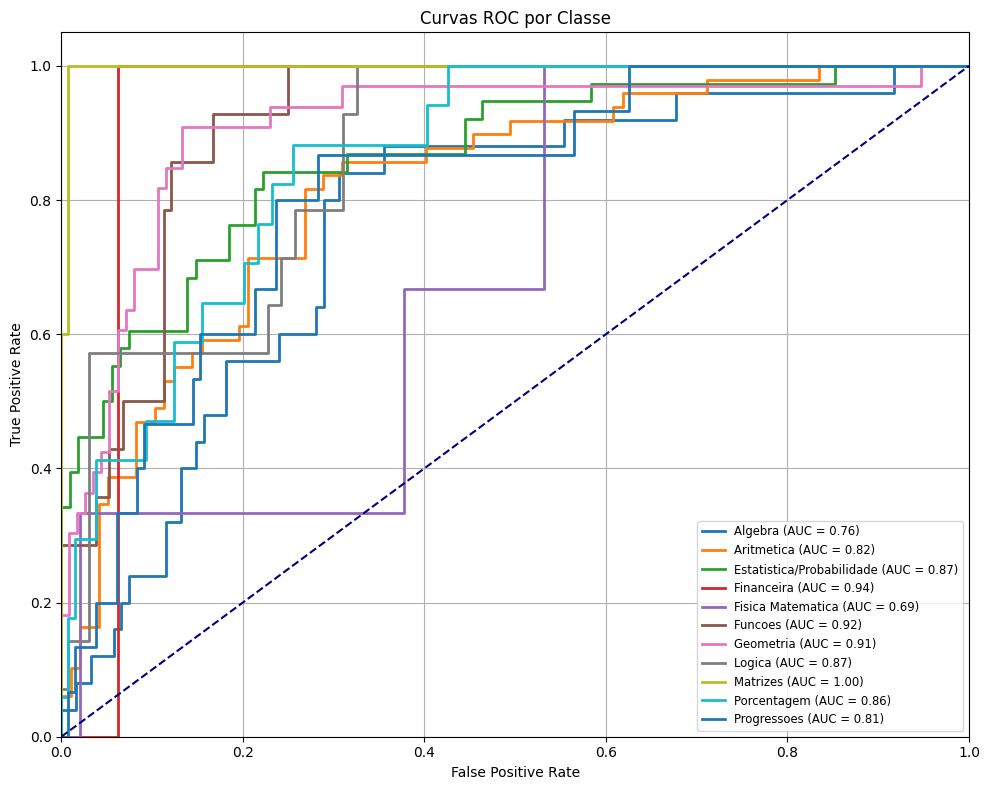

In [105]:
f1 = f1_score(y_test, y_pred, average='macro')
hamming = hamming_loss(y_test, y_pred)
exact_acc = accuracy_score(y_test, y_pred)

print(f"F1-score (macro): {f1:.4f}")
print(f"Hamming Loss: {hamming:.4f}")
print(f"Accuracy Multilabel Exata: {exact_acc:.4f}")

print(classification_report(y_test, y_pred, target_names=mlb.classes_))


n_classes = y_test.shape[1]
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{mlb.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC por Classe')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()



Para avaliar o desempenho do modelo desenvolvido neste projeto, foi utilizada a análise das curvas ROC (Receiver Operating Characteristic) e o cálculo da AUC (Area Under the Curve) para cada uma das classes temáticas de Matemática. A curva ROC é uma representação gráfica que mostra a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos para diferentes limiares de decisão do classificador, ou seja, diferentes valores que definem a partir de qual probabilidade o modelo considera que uma questão pertence a determinado tema. Quanto mais próxima a curva estiver da borda superior esquerda do gráfico, melhor o desempenho do modelo na separação correta dos exemplos.

A AUC quantifica essa performance: valores próximos de 0,5 indicam um desempenho aleatório, enquanto valores próximos de 1,0 indicam uma separação quase perfeita. Em termos práticos, quanto maior o valor da AUC, melhor a capacidade do modelo em distinguir corretamente os exemplos de uma classe em relação às demais.

Os resultados obtidos foram bastante satisfatórios. Temas como Financeira (AUC = 0.94), Funções (AUC = 0.92), Geometria (AUC = 0.91) e Lógica (AUC = 0.87) apresentaram altos valores de AUC, demonstrando que o modelo foi eficiente em identificar essas categorias com base apenas no enunciado das questões. O tema Matrizes alcançou uma AUC de 1.00, indicando uma classificação perfeita; no entanto, esse resultado pode ser um sinal de sobreajuste. Sobreajuste ocorre quando o modelo aprende excessivamente os padrões específicos dos dados de treino, capturando detalhes particulares em vez de padrões generalizáveis, o que pode comprometer seu desempenho em dados novos. No caso de Matrizes, a quantidade reduzida de questões, combinada com a alta especificidade dos enunciados, facilitou para que o modelo memorizasse características muito particulares dessa categoria, levando ao AUC perfeito. Por outro lado, Física Matemática, que também apresentou poucos dados, obteve um AUC mais baixo (0.69). Isso pode ser explicado pelo fato de que os enunciados de Física Matemática não são tão distintos de outras áreas, o que torna a tarefa de separação mais difícil para o modelo, mesmo com poucos exemplos. Assim, enquanto Matrizes apresentou poucos dados com enunciados muito característicos, favorecendo a memorização, Física Matemática sofreu com poucos dados e enunciados menos específicos, dificultando a diferenciação e comprometendo a capacidade preditiva do modelo.

Além da análise das curvas ROC e dos valores de AUC, o desempenho do modelo foi avaliado utilizando métricas como precisão (precision), revocação (recall) e F1-score para cada tema. A precisão mede a proporção de previsões corretas entre todas as previsões feitas para uma classe, enquanto a revocação indica a proporção de exemplos corretos identificados entre todos os exemplos reais daquela classe. O F1-score é a média harmônica entre precisão e revocação, oferecendo uma medida equilibrada entre essas duas métricas, especialmente útil quando há desequilíbrio entre classes.

Os resultados indicam que temas como Geometria (F1-score = 0.67) e Aritmética (F1-score = 0.59) apresentaram os melhores desempenhos individuais, enquanto várias classes, como Funções, Lógica e Matrizes, obtiveram F1-score igual a zero, indicando que o modelo não conseguiu prever essas categorias no conjunto de teste. A acurácia multilabel exata foi de 24,66%, o que significa que o modelo acertou todas as classes de uma questão exatamente em cerca de um quarto dos casos. Como o problema envolve classificação multilabel, onde uma questão pode ter mais de um tema correto, essa é uma métrica bastante rigorosa. A Hamming Loss de 0,1090 representa a média de classificações incorretas por questão e, quanto menor esse valor, melhor o desempenho do modelo. Embora o F1-score macro tenha sido relativamente baixo (0,1822), indicando dificuldades em prever algumas classes menos representadas, a análise geral mostra que o modelo teve melhor desempenho nas classes mais frequentes. 

Conclui-se, portanto, que o modelo desenvolvido apresenta uma boa capacidade de classificar questões de Matemática do ENEM em seus respectivos temas centrais com base apenas no enunciado. A análise das curvas ROC e dos valores de AUC indicou resultados bastante satisfatórios para as classes mais representativas, enquanto a avaliação por métricas de precisão, revocação e F1-score revelou um desempenho consistente especialmente nas categorias com maior número de exemplos. Embora o F1-score macro tenha sido relativamente baixo, refletindo a dificuldade do modelo em lidar com classes menos frequentes, a acurácia multilabel exata de 24,66% é significativa diante da complexidade do problema multilabel, onde múltiplos temas podem ser associados a uma mesma questão. Esses resultados mostram que a combinação de técnicas de web scraping, processamento de linguagem natural e regressão logística multiclasses é uma abordagem viável e promissora para apoiar estudantes na organização de seus estudos. O trabalho também evidencia oportunidades claras para aprimoramento, como o balanceamento da base de dados, a expansão do número de exemplos e a experimentação com algoritmos mais robustos, buscando elevar a capacidade preditiva e a generalização do modelo em cenários educacionais reais.